In [6]:
import sys

import networkx as nx
import igraph as ig
from networkx.generators.community import LFR_benchmark_graph

import numpy as np
import time

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 3

#sys.path.append("/home/oriol/Documents/Trento/JacobianGeometry/Code/Dynamics_v2/")
sys.path.append("/Users/giacomobarzon/Desktop/Network_geometry/Code_8thJune/Dynamics_v2/")
#sys.path.append("/home/barzon/Network_geometry/Code_8thJune/Dynamics_v2/")

import CommonFunctions as cf
import plotter

import importlib
importlib.reload(cf)
importlib.reload(plotter)

<module 'plotter' from '/Users/giacomobarzon/Desktop/Network_geometry/Code_8thJune/Dynamics_v2/plotter.py'>

# Graph generation

In [7]:
N = 60
mean_deg = 8.

In [8]:
num_groups = 4; nodes_per_group = N//4; kave = mean_deg; k_out = .15#kave is local average
k_in = kave - k_out
p_in = k_in/nodes_per_group
p_out = k_out/(nodes_per_group*num_groups - nodes_per_group)
print('Block model probs: in %f - out %f' % (p_in, p_out))

G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

while nx.is_connected(G_gn) == 0:
    print('The network should be in a single component. New trial!')
    G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

infoG_gn = ['GN',k_out]

print('Mean degree', np.mean(list(dict(G_gn.degree()).values())))

Block model probs: in 0.523333 - out 0.003333
Mean degree 7.966666666666667


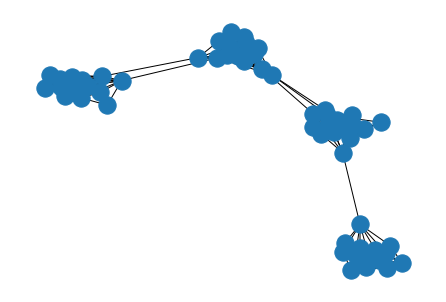

In [9]:
nx.draw(G_gn)

# Diffusion - Jacobian distance

In [792]:
def Simu(G, infoG, norm=False):
    """
    Inputs: dynamics (any from  dynamics_list = ['Mutualistic', 'Biochemical', 'Population', 'Regulatory',
                                                 'Epidemics','Synchronization', 'Neuronal', 'NoisyVM'])
            Network topology G
            infoG (list): Info about the network. infoG[0] = network_type; infoG[i>0] = parameters
    """
    print('-------- GRAPH DISTANCES --------')
    start_time = time.time()
    
    num_nodes = G.number_of_nodes()
    #num_time_points = 50 # small to decrease computational load
    times = np.linspace(0, num_nodes, num = num_nodes+1) #time to find the steady state    
    times_perturbation = np.linspace(0, num_nodes, num = num_nodes+1) #times at which we look how the perturbation evolves
    
    if nx.is_connected(G) == 0:
        raise ValueError('The network should be in a single component. Exit!')
    
    dist_t = []
    avg_dist_t = []
    
    for dynamics in dynamics_list:
        
        if dynamics == 'Diffusion':
            ### DIFFUSION
            print('[*] DIFFUSION DISTANCE')
            print('Evaluating diffusion distance...')
            tmp_d = cf.Laplacian(nx.to_numpy_array(G), times_perturbation, return_snapshot=True)
        
        else:
            ### JACOBIAN
            print('[*] JACOBIAN DISTANCE - '+str(dynamics))
        
            #Integration to get the steady state
            print('Integration up to steady state...')
            initial_state = np.random.random(len(G.nodes()))   
            SteadyState_ref, char_time = cf.Numerical_Integration(G, dynamics, initial_state, times = times, fixed_node = 1e+6, show = 1)
            SteadyState_ref = SteadyState_ref[-1]
        
            if char_time == np.inf:
                char_time = 100**(1/1.7)
            print('Char time: ', char_time)

            # analytical expression of Jacobian
            print('Evaluating jacobian distance...')
            tmp_d = cf.Jacobian(G, dynamics, SteadyState_ref, times_perturbation, return_snapshot=True, norm=norm)
        
        dist_t.append(tmp_d[0])
        avg_dist_t.append(tmp_d[1])
        
    return dist_t, avg_dist_t

In [793]:
dynamics_list = ['Mutualistic', 'Biochemical', 'Population', 'Regulatory','Epidemics','Synchronization', 'Neuronal', 'NoisyVM', 'Diffusion']
dynamics_short = ['MUT', 'BIO', 'POP', 'REG', 'EPI', 'SYN', 'NEU', 'NVM', 'DIF']

-------- GRAPH DISTANCES --------
[*] JACOBIAN DISTANCE - Mutualistic
Integration up to steady state...


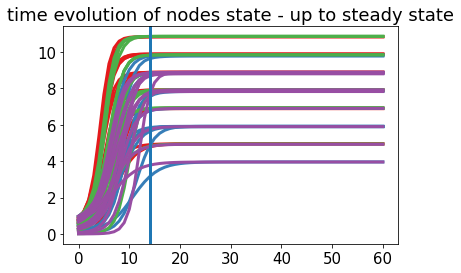

Char time:  14.0
Evaluating jacobian distance...
largest eig: 1.0885208241559479
eigs sum: -47.919721415609374


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Biochemical
Integration up to steady state...


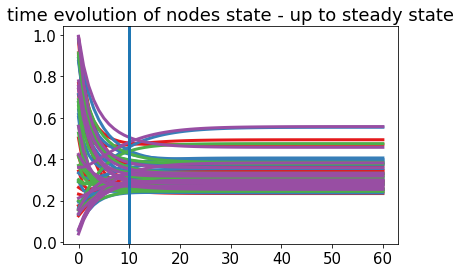

Char time:  10.0
Evaluating jacobian distance...
largest eig: 0.5843131435146642
eigs sum: -19.16985832124253


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Population
Integration up to steady state...


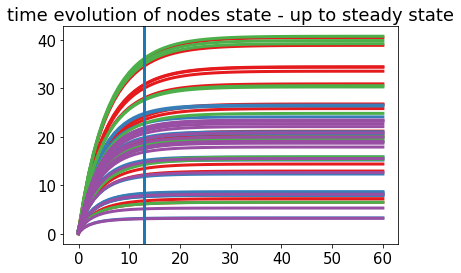

Char time:  13.0
Evaluating jacobian distance...
largest eig: 0.8621525307753928
eigs sum: -22.714967766039074


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Regulatory
Integration up to steady state...


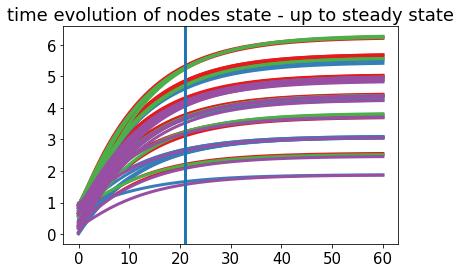

Char time:  21.0
Evaluating jacobian distance...
largest eig: 0.10949244339944479
eigs sum: -6.0


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Epidemics
Integration up to steady state...


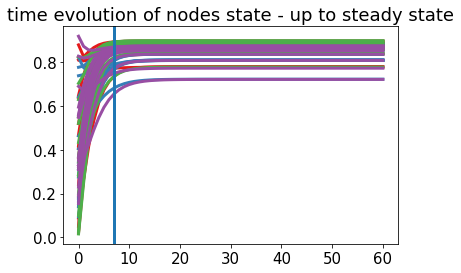

Char time:  7.0
Evaluating jacobian distance...
largest eig: 0.9845056631084799
eigs sum: -42.6670627734459


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Synchronization
Integration up to steady state...


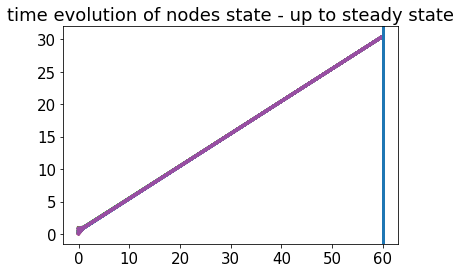

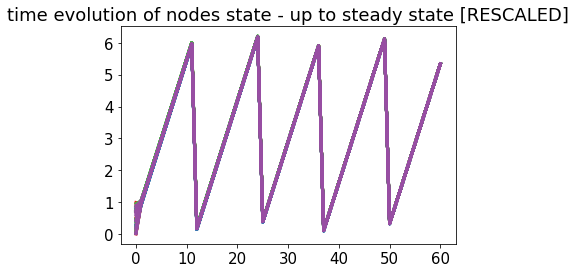

Char time:  60.0
Evaluating jacobian distance...
largest eig: 6.2075073654612805
eigs sum: -212.99997838009358


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Neuronal
Integration up to steady state...


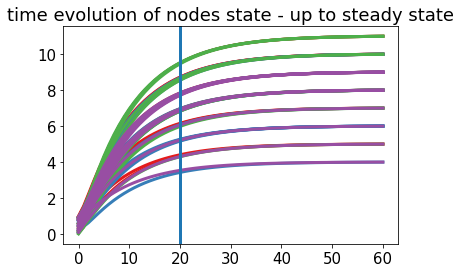

Char time:  20.0
Evaluating jacobian distance...
largest eig: 0.10013958178651557
eigs sum: -5.999631205733598


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - NoisyVM
Integration up to steady state...


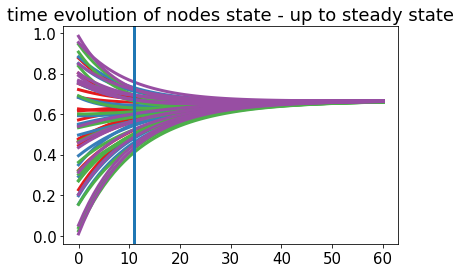

Char time:  11.0
Evaluating jacobian distance...
largest eig: 0.11658056746162353
eigs sum: -6.000000000000001


  0%|          | 0/61 [00:00<?, ?it/s]

[*] DIFFUSION DISTANCE
Evaluating diffusion distance...
largest eig: 1.624522914950188
eigs sum: 60.0


  0%|          | 0/61 [00:00<?, ?it/s]

In [794]:
dist_t, avg_dist_t = Simu(G_gn, infoG_gn)

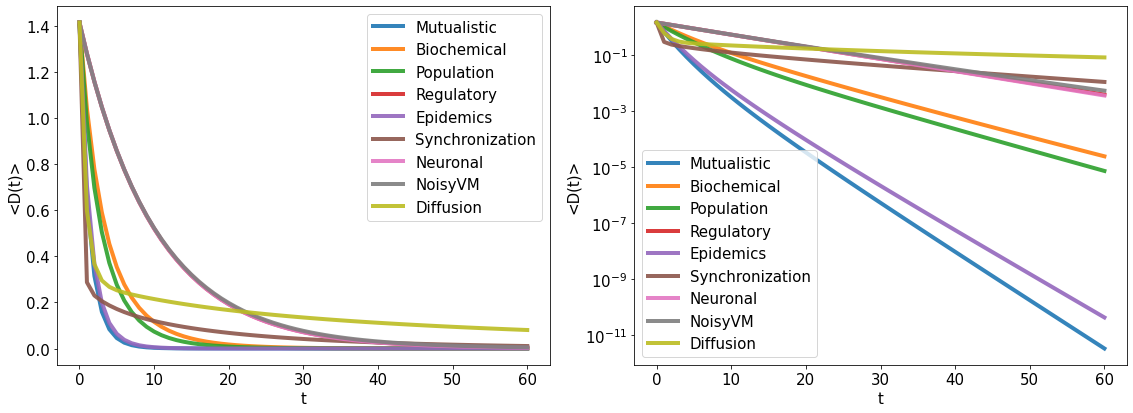

In [795]:
plt.figure(figsize=(16,6))

lw = 4.

plt.subplot(1,2,1)

for i, res in enumerate(dist_t):
    plt.plot(res, label=dynamics_list[i], lw=lw, alpha=0.9)

plt.xlabel('t')
plt.ylabel('<D(t)>')
#plt.yscale('log')
plt.legend()

plt.subplot(1,2,2)

for i, res in enumerate(dist_t):
    plt.plot(res, label=dynamics_list[i], lw=lw, alpha=0.9)

plt.xlabel('t')
plt.ylabel('<D(t)>')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# provare a fare fit dell'ultima parte

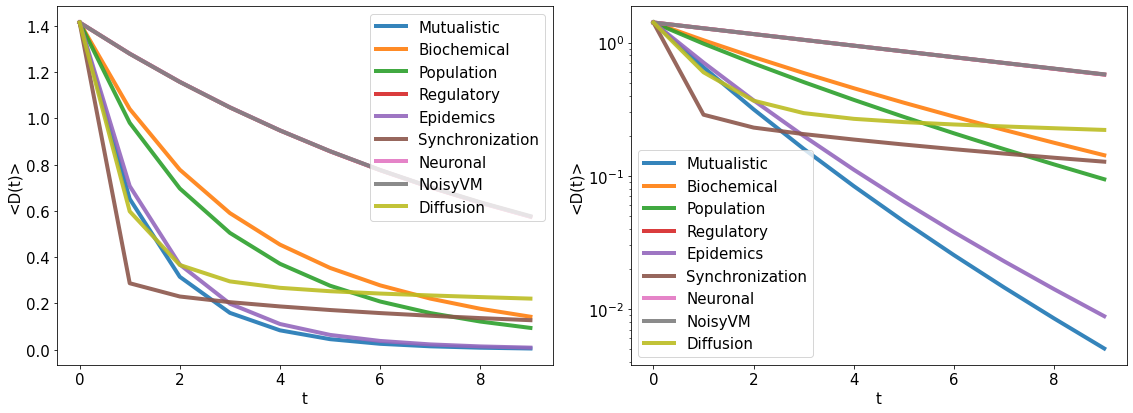

In [808]:
plt.figure(figsize=(16,6))

T = 10
lw = 4.

plt.subplot(1,2,1)

for i, res in enumerate(dist_t):
    plt.plot(res[:T], label=dynamics_list[i], lw=lw, alpha=0.9)

plt.xlabel('t')
plt.ylabel('<D(t)>')
plt.legend()

plt.subplot(1,2,2)

for i, res in enumerate(dist_t):
    plt.plot(res[:T], label=dynamics_list[i], lw=lw, alpha=0.9)

plt.xlabel('t')
plt.ylabel('<D(t)>')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

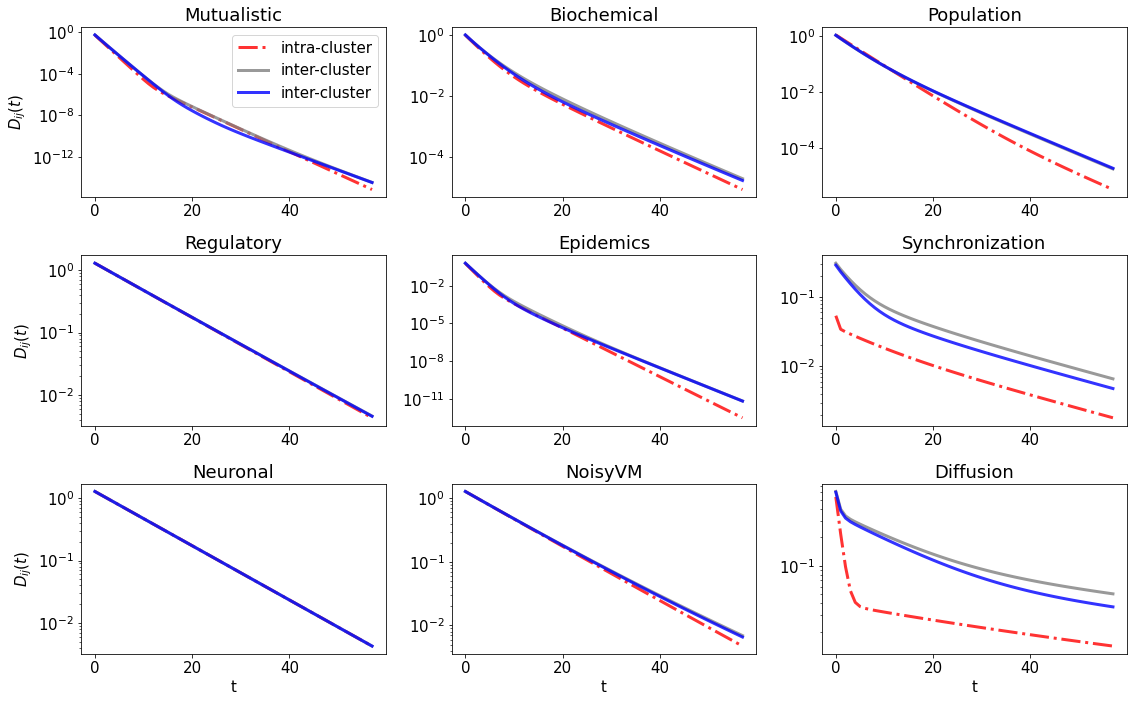

In [796]:
node_a = 0
node_b = 1
node_c = N-2
node_d = N-1

Tmax = N-1
alpha = 0.8

plt.figure(figsize=(16,10))

for i, res in enumerate(avg_dist_t):
    plt.subplot(3, 3, i+1)

    plt.plot(res[1:Tmax,node_a,node_b], '-.', label='intra-cluster', c='red', alpha=alpha)
    #plt.plot(res[1:Tmax,node_c,node_d], '-.', label='intra-cluster', c='black', alpha=alpha)
    plt.plot(res[1:Tmax,node_a,node_c], label='inter-cluster', c='gray', alpha=alpha)
    plt.plot(res[1:Tmax,node_b,node_c], label='inter-cluster', c='blue', alpha=alpha)

    plt.yscale('log')

    if i%3==0:
        plt.ylabel(r'$D_{ij}(t)$')
    if i-5>0:
        plt.xlabel('t')
    
    plt.title(dynamics_list[i])
    
    if i==0:
        plt.legend()

plt.tight_layout()
plt.show()

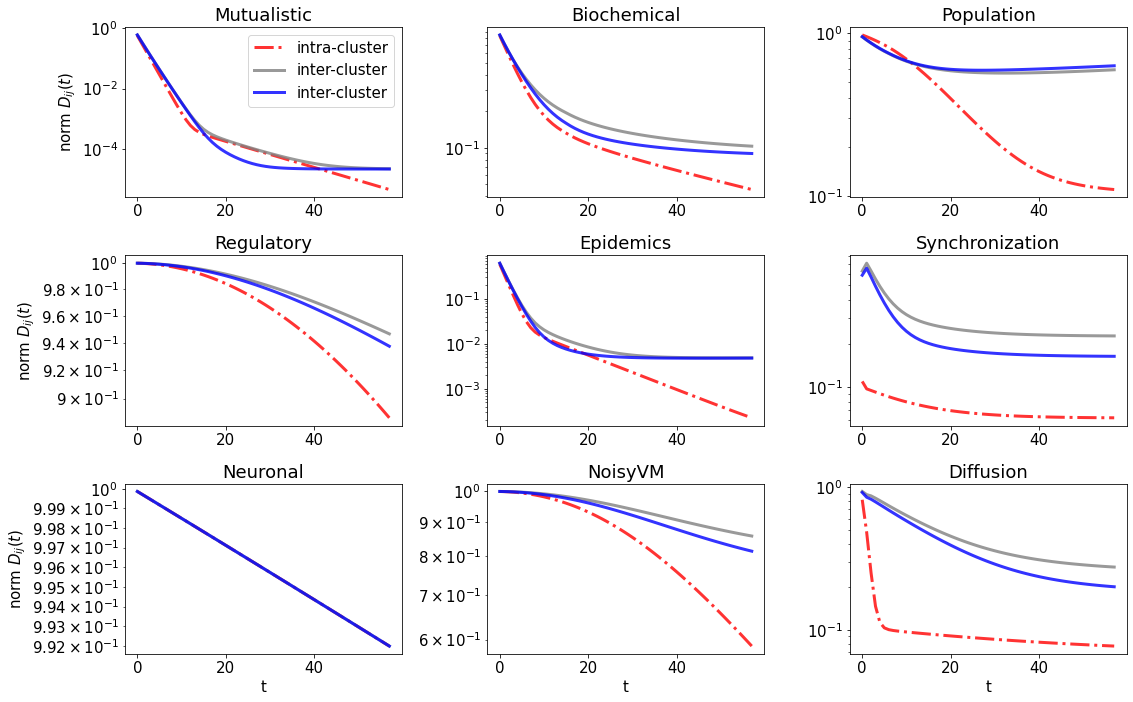

In [797]:
node_a = 0
node_b = 1
node_c = N-2
node_d = N-1

Tmax = N-1
alpha = 0.8

plt.figure(figsize=(16,10))

for i, res in enumerate(avg_dist_t):
    plt.subplot(3, 3, i+1)

    plt.plot(res[1:Tmax,node_a,node_b] / np.max(res[1:Tmax],axis=2).max(axis=1), '-.', label='intra-cluster', c='red', alpha=alpha)
    #plt.plot(res[1:Tmax,node_c,node_d], '-.', label='intra-cluster', c='black', alpha=alpha)
    plt.plot(res[1:Tmax,node_a,node_c] / np.max(res[1:Tmax],axis=2).max(axis=1), label='inter-cluster', c='gray', alpha=alpha)
    plt.plot(res[1:Tmax,node_b,node_c] / np.max(res[1:Tmax],axis=2).max(axis=1), label='inter-cluster', c='blue', alpha=alpha)

    plt.yscale('log')

    if i%3==0:
        plt.ylabel(r'norm $D_{ij}(t)$')
    if i-5>0:
        plt.xlabel('t')
    
    plt.title(dynamics_list[i])
    
    if i==0:
        plt.legend()

plt.tight_layout()
plt.show()

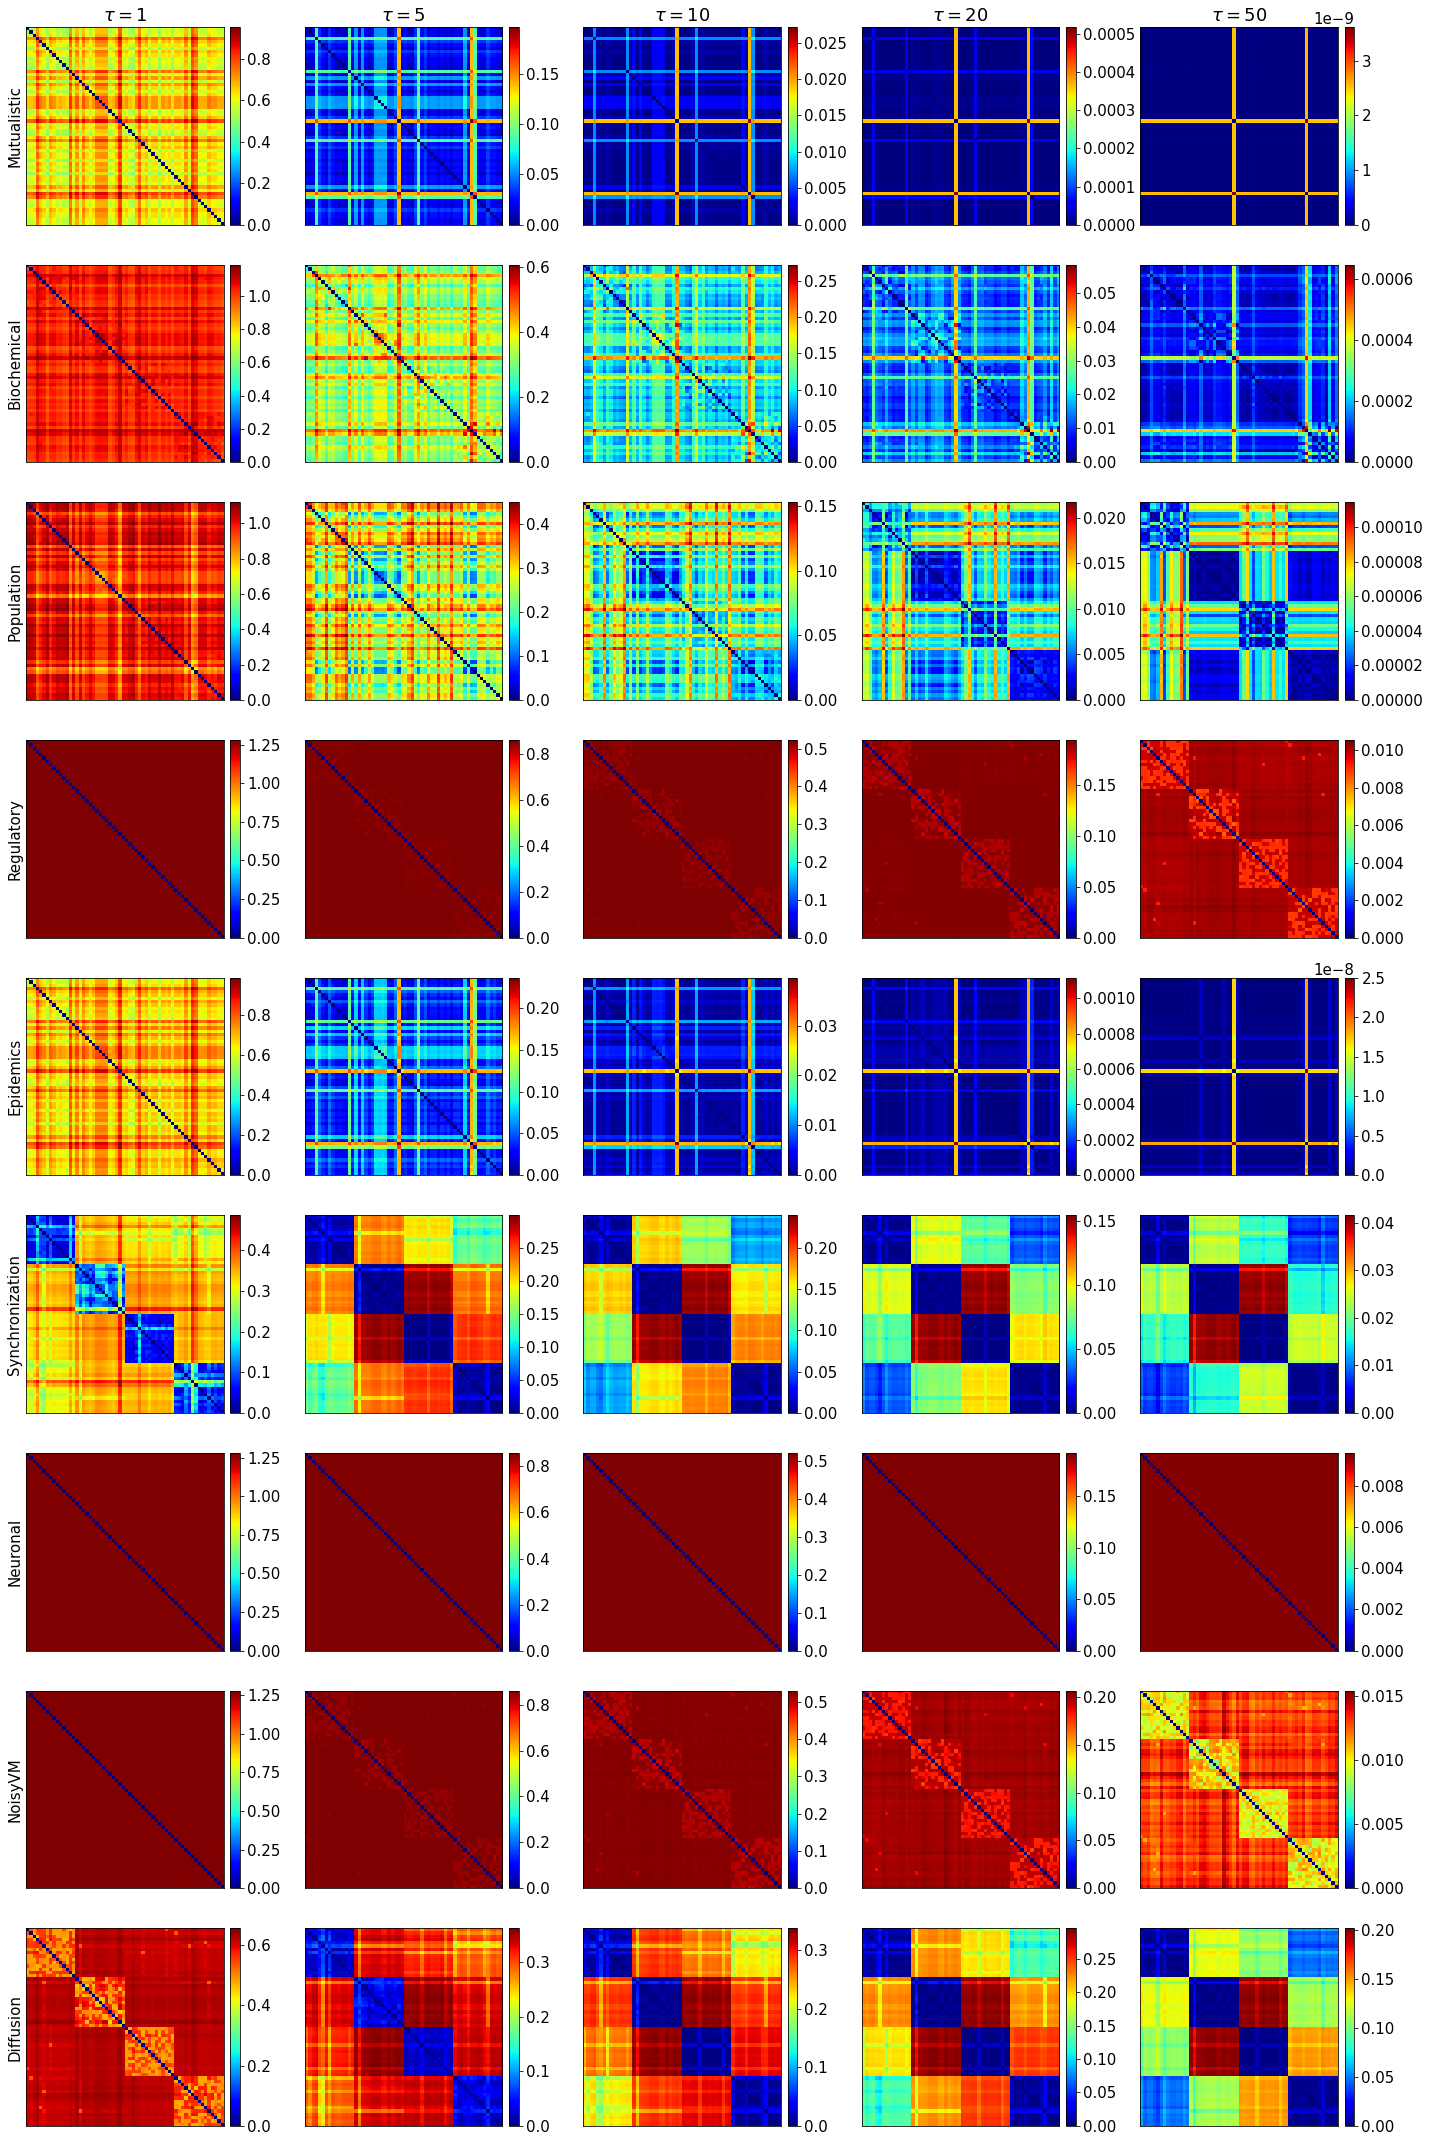

In [798]:
plotter.plot_dist_matrix_evol(avg_dist_t, dynamics_list, hspace=0)

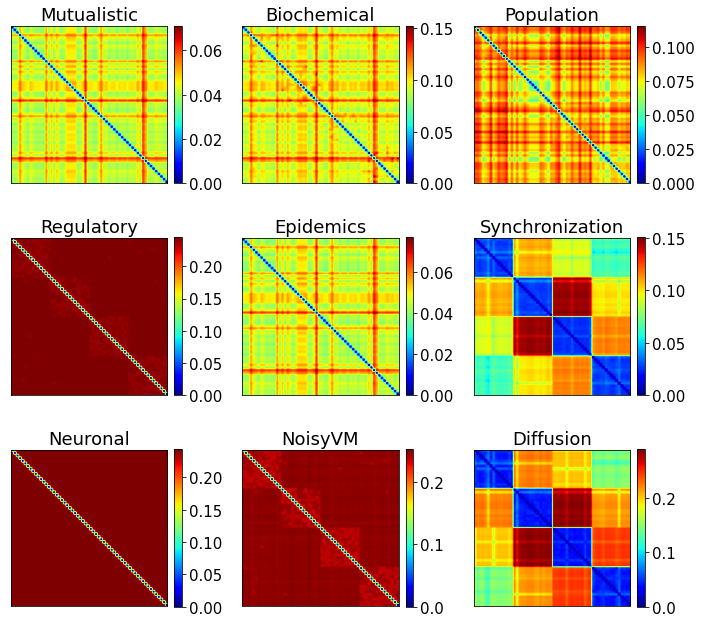

In [799]:
plotter.plot_average_dist_matrix(avg_dist_t, dynamics_list, hspace=-.95)

## - Average normalized

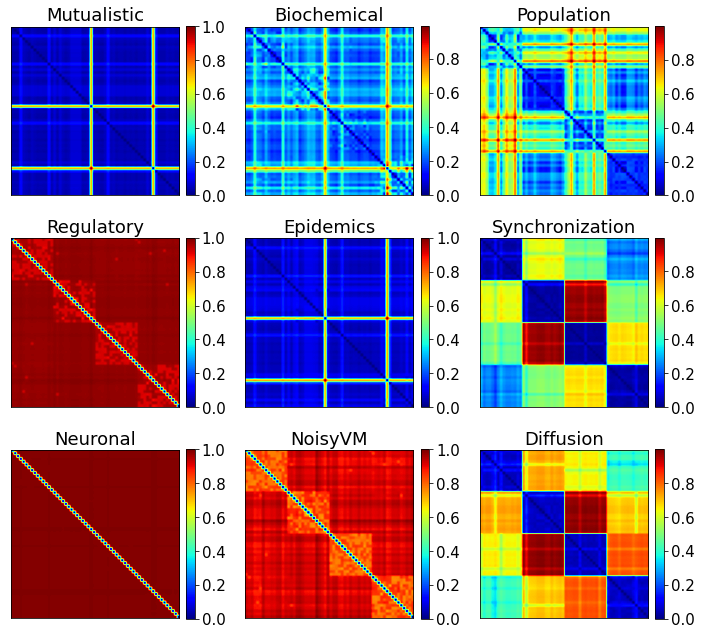

In [810]:
plotter.plot_average_dist_matrix(avg_dist_t, dynamics_list, hspace=-.95, norm = True)

## - Introducing $\tau_{min}$

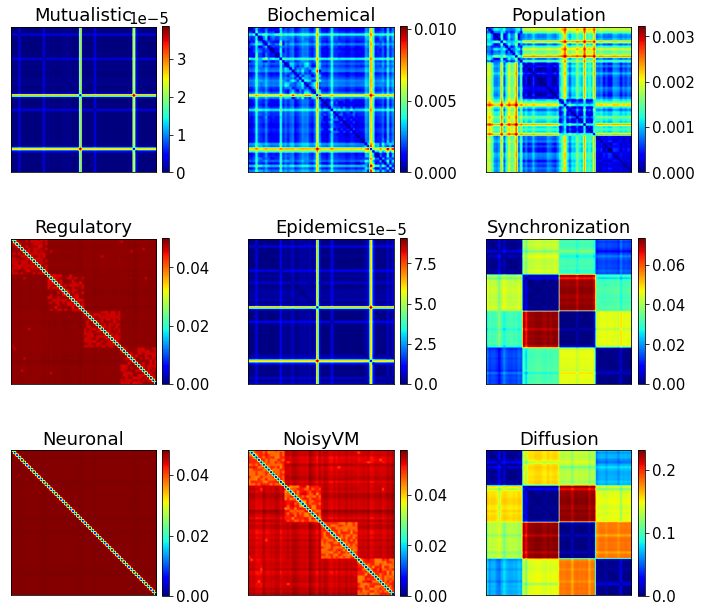

In [801]:
plotter.plot_average_dist_matrix(avg_dist_t, dynamics_list, hspace=-.95, norm=False, tmin=20)

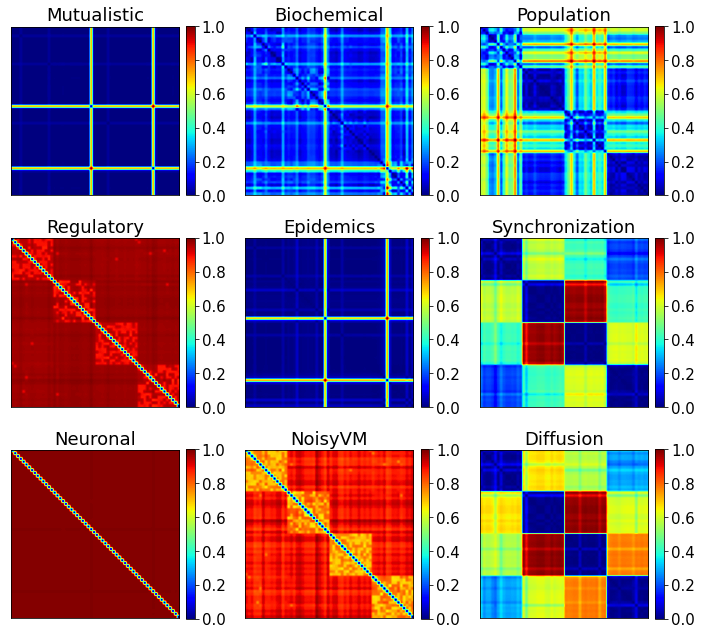

In [802]:
plotter.plot_average_dist_matrix(avg_dist_t, dynamics_list, hspace=-.95, norm=True, tmin=20)

# Mantel test

-------- GRAPH DISTANCES --------
[*] JACOBIAN DISTANCE - Mutualistic
Integration up to steady state...


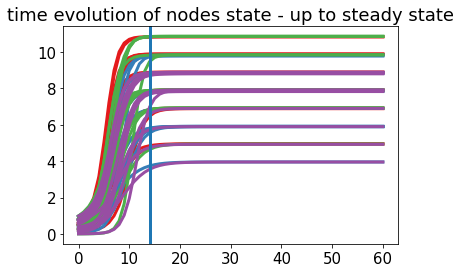

Char time:  14.0
Evaluating jacobian distance...
largest eig: 1.0885208241550803
eigs sum: -47.919721417088155


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Biochemical
Integration up to steady state...


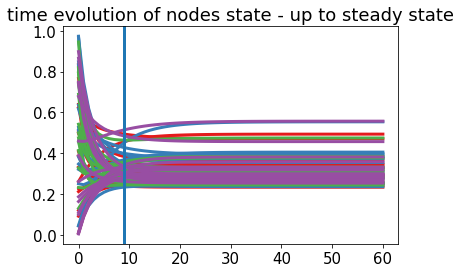

Char time:  9.0
Evaluating jacobian distance...
largest eig: 0.5843132721905339
eigs sum: -19.1698658551304


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Population
Integration up to steady state...


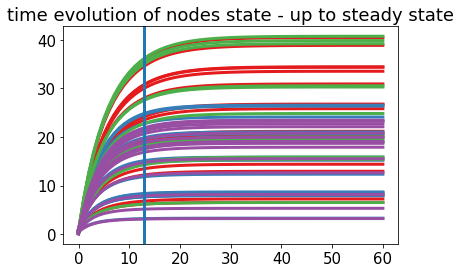

Char time:  13.0
Evaluating jacobian distance...
largest eig: 0.8621525327595121
eigs sum: -22.7149676850442


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Regulatory
Integration up to steady state...


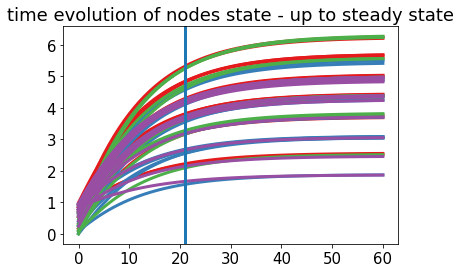

Char time:  21.0
Evaluating jacobian distance...
largest eig: 0.10948348895077482
eigs sum: -6.000000000000001


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Epidemics
Integration up to steady state...


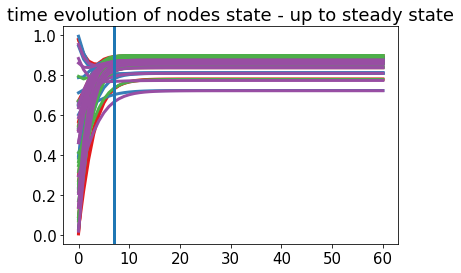

Char time:  7.0
Evaluating jacobian distance...
largest eig: 0.9845056631317661
eigs sum: -42.66706277130056


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Synchronization
Integration up to steady state...


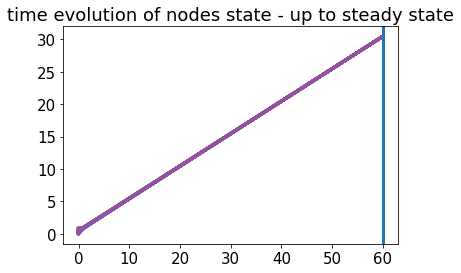

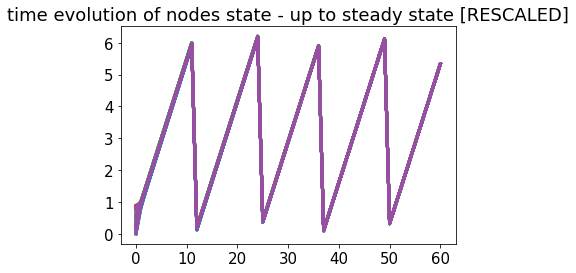

Char time:  60.0
Evaluating jacobian distance...
largest eig: 6.207506194928017
eigs sum: -212.99996410137308


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Neuronal
Integration up to steady state...


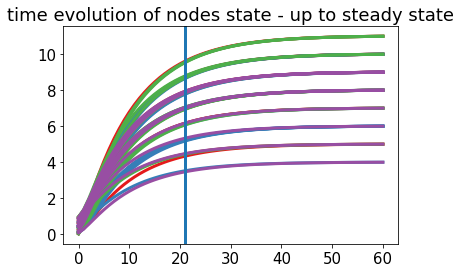

Char time:  21.0
Evaluating jacobian distance...
largest eig: 0.10014021854346271
eigs sum: -5.999630822034406


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - NoisyVM
Integration up to steady state...


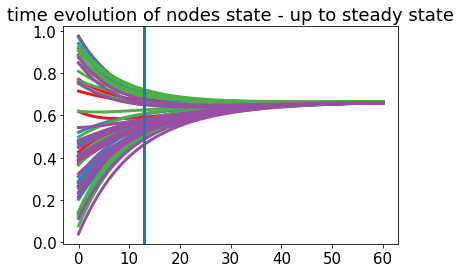

Char time:  13.0
Evaluating jacobian distance...
largest eig: 0.1165303697928072
eigs sum: -6.0


  0%|          | 0/61 [00:00<?, ?it/s]

[*] DIFFUSION DISTANCE
Evaluating diffusion distance...
largest eig: 1.624522914950188
eigs sum: 60.0


  0%|          | 0/61 [00:00<?, ?it/s]

In [310]:
dist_t, avg_dist_t = Simu(G_gn, infoG_gn, norm=True)

https://github.com/jwcarr/mantel

In [ ]:
import mantel
from matplotlib import cm
import copy

In [ ]:
avg_dist = []
avg_dist_norm = []

for res in results:
    avg_dist.append(np.mean(res[1],axis=0))
    avg_dist_norm.append(get_average_matrix(res[1]))

In [ ]:
corrs = np.zeros((len(dynamics_list)+1,len(dynamics_list)+1))

for i, matX in enumerate(avg_dist[:-1]):
    for j, matY in enumerate(avg_dist[i+1:]):
        #tmp = mantel.test(matX, matY, perms=10000, method='pearson', tail='upper')
        #print(tmp)
        corrs[i,i+j+1] = mantel.test(matX, matY, perms=10000, method='pearson', tail='upper')[0]

In [ ]:
fig = plt.figure(figsize=(10,10))

corrs_mask = corrs[:-1]
corrs_mask = corrs_mask[:,1:]

cmap = cmap = copy.copy(cm.get_cmap("bwr_r"))
cmap.set_bad('w') # default value is 'k'

im = plt.imshow(corrs_mask, interpolation="nearest", cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.axis('off')

for i, name in enumerate(dynamics_short):
    plt.text(i-1.2, i+0.05, name, weight="bold")
    
for i in range(corrs_mask.shape[0]):
    for j in range(i, corrs_mask.shape[0]):
        plt.text(j-0.25, i+0.1, corrs_mask[i,j].round(decimals=2))

plt.show()

In [ ]:
corrs_norm = np.zeros((len(dynamics_list)+1,len(dynamics_list)+1))

for i, matX in enumerate(avg_dist_norm[:-1]):
    for j, matY in enumerate(avg_dist_norm[i+1:]):
        corrs_norm[i,i+j+1] = mantel.test(matX, matY, perms=10000, method='pearson', tail='upper')[0]

In [ ]:
fig = plt.figure(figsize=(10,10))

corrs_mask = corrs_norm[:-1]
corrs_mask = corrs_mask[:,1:]

cmap = cmap = copy.copy(cm.get_cmap("bwr_r"))
cmap.set_bad('w') # default value is 'k'

im = plt.imshow(corrs_mask, interpolation="nearest", cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.axis('off')

for i, name in enumerate(dynamics_short):
    plt.text(i-1.2, i+0.05, name, weight="bold")
    
for i in range(corrs_mask.shape[0]):
    for j in range(i, corrs_mask.shape[0]):
        plt.text(j-0.25, i+0.1, corrs_mask[i,j].round(decimals=2))

plt.show()

# Varying parameters in diffusion distance

In [37]:
def Simu_diffu_params(G, infoG, params):
    """
    Inputs: Network topology G
            infoG (list): Info about the network. infoG[0] = network_type; infoG[i>0] = parameters
            dynamic (any from  dynamics_list = ['Mutualistic', 'Biochemical', 'Population', 'Regulatory',
                                                 'Epidemics','Synchronization', 'Neuronal', 'NoisyVM'])
            kwargs: parameters of model
    """
    print('-------- GRAPH DISTANCES --------')
    start_time = time.time()
    
    num_nodes = G.number_of_nodes()
    #num_time_points = 50 # small to decrease computational load
    times_perturbation = np.linspace(0, num_nodes, num = num_nodes+1) #times at which we look how the perturbation evolves
    
    if nx.is_connected(G) == 0:
        raise ValueError('The network should be in a single component. Exit!')
    
    dist_t = []
    avg_dist_t = []
    
    for param in params:
        ### JACOBIAN
        print('[*] DIFFUSION DISTANCE - PARAMS: '+str(param))
        # analytical expression of Jacobian
        print('Evaluating jacobian distance...')
        tmp_d = cf.Laplacian(nx.to_numpy_array(G), times_perturbation, A=param[0], B=param[1], return_snapshot=True)
        
        dist_t.append(tmp_d[0])
        avg_dist_t.append(tmp_d[1])
    
    return dist_t, avg_dist_t

In [38]:
# Define parameters
param_1 = [0.1, 0.5, 1., 2., 5.]
param_2 = [0.1, 0.5, 1., 2., 5.]
params = [[a, b] for a in param_1 for b in param_2]

param_1_name = 'A'
param_2_name = 'B'
params_name = [param_1_name+'='+str(a)+','+param_2_name+'='+str(b) for a in param_1 for b in param_2]
params_rows = [param_1_name+'='+str(a) for a in param_1]
params_cols = [param_2_name+'='+str(b) for b in param_2]

In [39]:
dist_t, avg_dist_t = Simu_diffu_params(G_gn, infoG_gn, params)

-------- GRAPH DISTANCES --------
[*] DIFFUSION DISTANCE - PARAMS: [0.1, 0.1]
Evaluating jacobian distance...
largest eig: 0.15263967888009763
eigs sum: 5.999999999999999



[*] DIFFUSION DISTANCE - PARAMS: [0.1, 0.5]
Evaluating jacobian distance...
largest eig: 0.41416259676474615
eigs sum: 6.000000000000001



[*] DIFFUSION DISTANCE - PARAMS: [0.1, 1.0]
Evaluating jacobian distance...
largest eig: 0.9283251935294919
eigs sum: 5.9999999999999964



[*] DIFFUSION DISTANCE - PARAMS: [0.1, 2.0]
Evaluating jacobian distance...
largest eig: 1.9566503870589846
eigs sum: 5.999999999999998



[*] DIFFUSION DISTANCE - PARAMS: [0.1, 5.0]
Evaluating jacobian distance...
largest eig: 5.041625967647464
eigs sum: 5.999999999999999



[*] DIFFUSION DISTANCE - PARAMS: [0.5, 0.1]
Evaluating jacobian distance...
largest eig: 0.5526396788800972
eigs sum: 30.000000000000004



[*] DIFFUSION DISTANCE - PARAMS: [0.5, 0.5]
Evaluating jacobian distance...
largest eig: 0.7631983944004879
eigs sum: 29.999999999999996



[*] DIFFUSION DISTANCE - PARAMS: [0.5, 1.0]
Evaluating jacobian distance...
largest eig: 1.0263967888009766
eigs sum: 30.0



[*] DIFFUSION DISTANCE - PARAMS: [0.5, 2.0]
Evaluating jacobian distance...
largest eig: 1.5566503870589847
eigs sum: 29.999999999999996



[*] DIFFUSION DISTANCE - PARAMS: [0.5, 5.0]
Evaluating jacobian distance...
largest eig: 4.641625967647462
eigs sum: 30.000000000000007



[*] DIFFUSION DISTANCE - PARAMS: [1.0, 0.1]
Evaluating jacobian distance...
largest eig: 1.052639678880098
eigs sum: 60.0



[*] DIFFUSION DISTANCE - PARAMS: [1.0, 0.5]
Evaluating jacobian distance...
largest eig: 1.2631983944004885
eigs sum: 60.00000000000001



[*] DIFFUSION DISTANCE - PARAMS: [1.0, 1.0]
Evaluating jacobian distance...
largest eig: 1.5263967888009757
eigs sum: 59.99999999999999



[*] DIFFUSION DISTANCE - PARAMS: [1.0, 2.0]
Evaluating jacobian distance...
largest eig: 2.0527935776019532
eigs sum: 60.0



[*] DIFFUSION DISTANCE - PARAMS: [1.0, 5.0]
Evaluating jacobian distance...
largest eig: 4.141625967647461
eigs sum: 59.999999999999986



[*] DIFFUSION DISTANCE - PARAMS: [2.0, 0.1]
Evaluating jacobian distance...
largest eig: 2.0526396788800962
eigs sum: 120.0



[*] DIFFUSION DISTANCE - PARAMS: [2.0, 0.5]
Evaluating jacobian distance...
largest eig: 2.263198394400488
eigs sum: 120.0



[*] DIFFUSION DISTANCE - PARAMS: [2.0, 1.0]
Evaluating jacobian distance...
largest eig: 2.526396788800977
eigs sum: 120.00000000000001



[*] DIFFUSION DISTANCE - PARAMS: [2.0, 2.0]
Evaluating jacobian distance...
largest eig: 3.0527935776019515
eigs sum: 119.99999999999999



[*] DIFFUSION DISTANCE - PARAMS: [2.0, 5.0]
Evaluating jacobian distance...
largest eig: 4.631983944004881
eigs sum: 119.99999999999999



[*] DIFFUSION DISTANCE - PARAMS: [5.0, 0.1]
Evaluating jacobian distance...
largest eig: 5.052639678880102
eigs sum: 300.0



[*] DIFFUSION DISTANCE - PARAMS: [5.0, 0.5]
Evaluating jacobian distance...
largest eig: 5.263198394400489
eigs sum: 300.0



[*] DIFFUSION DISTANCE - PARAMS: [5.0, 1.0]
Evaluating jacobian distance...
largest eig: 5.526396788800975
eigs sum: 300.0



[*] DIFFUSION DISTANCE - PARAMS: [5.0, 2.0]
Evaluating jacobian distance...
largest eig: 6.052793577601949
eigs sum: 300.0



[*] DIFFUSION DISTANCE - PARAMS: [5.0, 5.0]
Evaluating jacobian distance...
largest eig: 7.631983944004886
eigs sum: 299.9999999999999


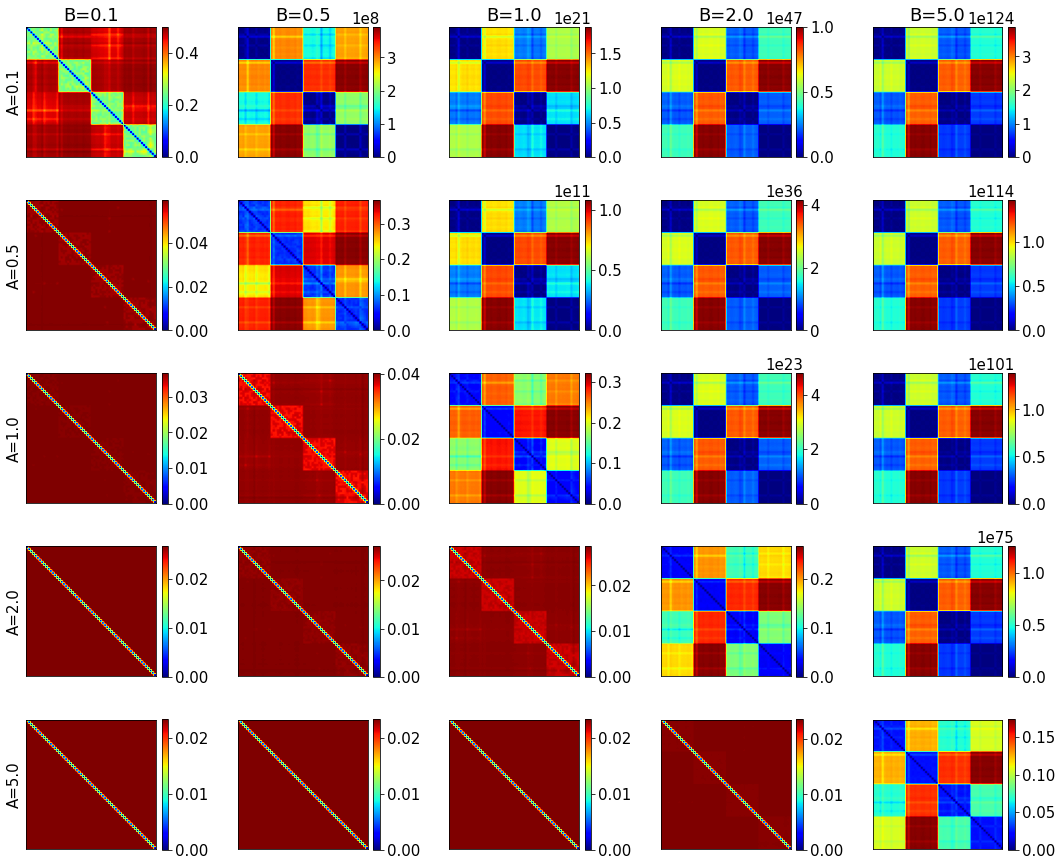

In [40]:
plotter.plot_average_dist_matrix_square(avg_dist_t, params_rows, params_cols, hspace=-.97, norm = False)

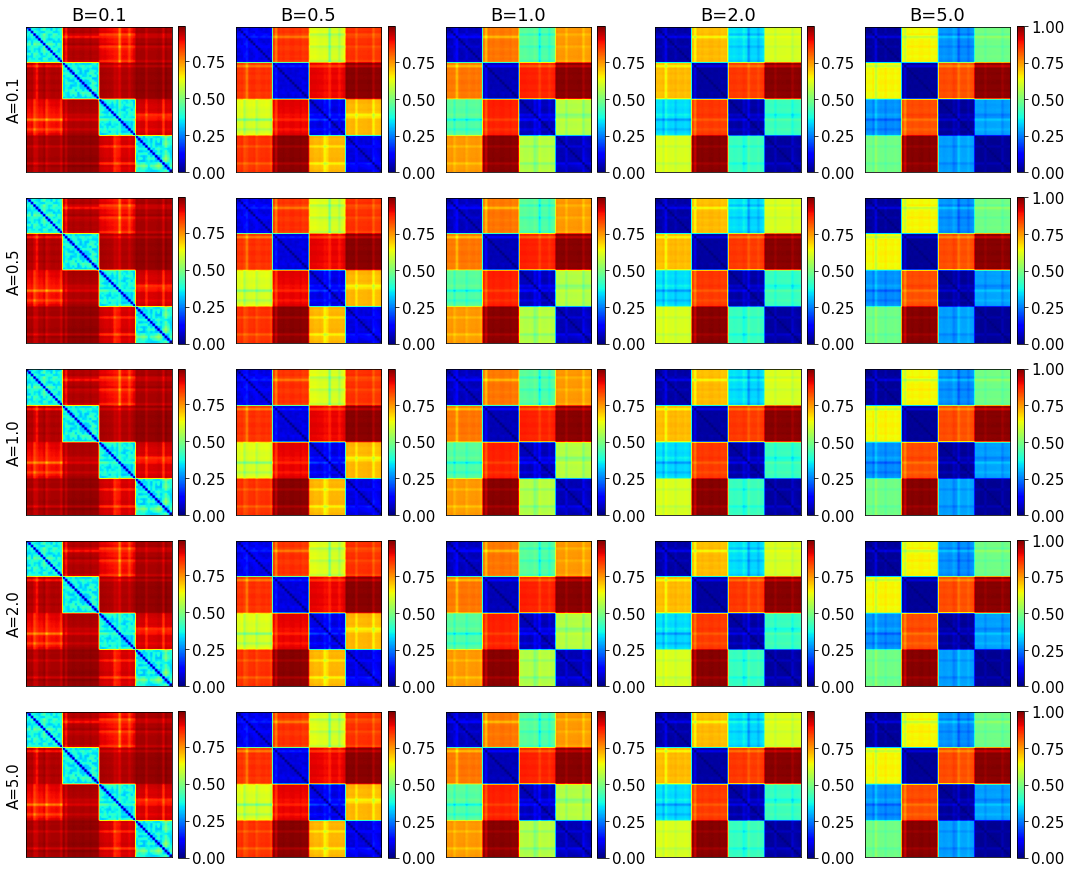

In [41]:
plotter.plot_average_dist_matrix_square(avg_dist_t, params_rows, params_cols, hspace=-.97, norm = True)

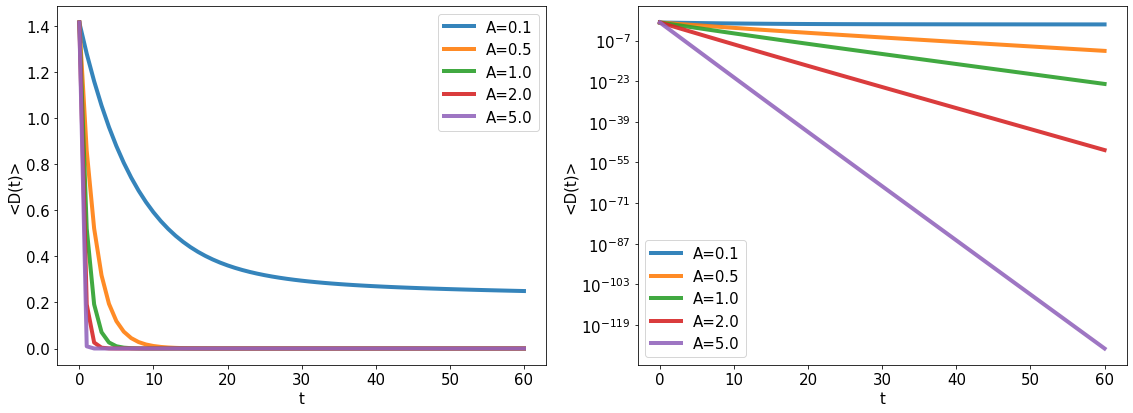

In [47]:
# Fixed B, what happens if change A
plt.figure(figsize=(16,6))

lw = 4.

plt.subplot(1,2,1)

for i, res in enumerate(dist_t):
    if i%5 == 0:
        plt.plot(res, label='A='+str(params[i][0]), lw=lw, alpha=0.9)

plt.xlabel('t')
plt.ylabel('<D(t)>')
plt.legend()

plt.subplot(1,2,2)

for i, res in enumerate(dist_t):
    if i%5 == 0:
        plt.plot(res, label='A='+str(params[i][0]), lw=lw, alpha=0.9)

plt.xlabel('t')
plt.ylabel('<D(t)>')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

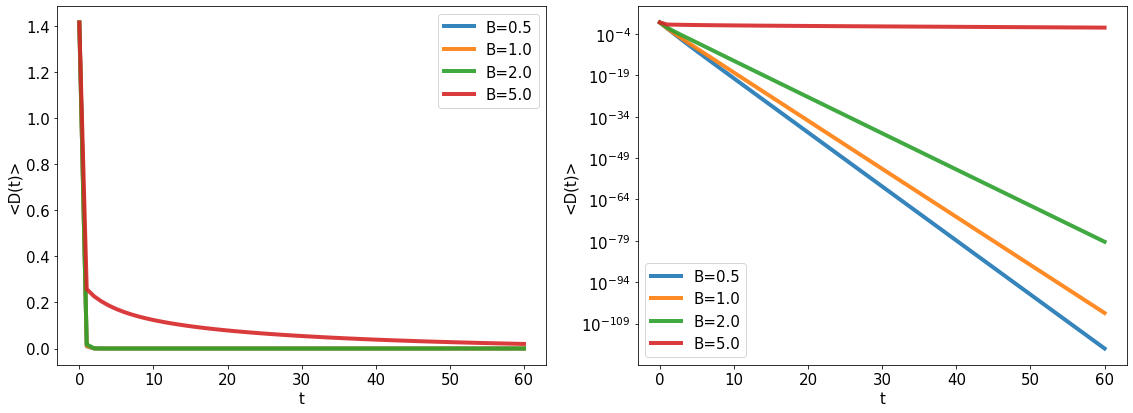

In [50]:
# Fixed A, what happens if change B
plt.figure(figsize=(16,6))

lw = 4.

plt.subplot(1,2,1)

for i, res in enumerate(dist_t):
    if i > len(dist_t) - 5:
        plt.plot(res, label='B='+str(params[i][1]), lw=lw, alpha=0.9)

plt.xlabel('t')
plt.ylabel('<D(t)>')
plt.legend()

plt.subplot(1,2,2)

for i, res in enumerate(dist_t):
    if i > len(dist_t) - 5:
        plt.plot(res, label='B='+str(params[i][1]), lw=lw, alpha=0.9)

plt.xlabel('t')
plt.ylabel('<D(t)>')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

# Varying parameters of dynamics

In [126]:
def Simu_params(G, infoG, dynamics, params):
    """
    Inputs: Network topology G
            infoG (list): Info about the network. infoG[0] = network_type; infoG[i>0] = parameters
            dynamic (any from  dynamics_list = ['Mutualistic', 'Biochemical', 'Population', 'Regulatory',
                                                 'Epidemics','Synchronization', 'Neuronal', 'NoisyVM'])
            kwargs: parameters of model
    """
    print('-------- GRAPH DISTANCES --------')
    start_time = time.time()
    
    num_nodes = G.number_of_nodes()
    #num_time_points = 50 # small to decrease computational load
    times = np.linspace(0, num_nodes, num = num_nodes+1) #time to find the steady state    
    times_perturbation = np.linspace(0, num_nodes, num = num_nodes+1) #times at which we look how the perturbation evolves
    
    if nx.is_connected(G) == 0:
        raise ValueError('The network should be in a single component. Exit!')
    
    dist_t = []
    avg_dist_t = []
    
    for param in params:
    
        ### JACOBIAN
        print('[*] JACOBIAN DISTANCE - '+str(dynamics)+' - PARAMS: '+str(param))
        
        #Integration to get the steady state
        print('Integration up to steady state...')
        initial_state = np.random.random(len(G.nodes()))   
        SteadyState_ref, char_time = cf.Numerical_Integration(G, dynamics, initial_state, times = times, fixed_node = 1e+6, show = 1, epsilon = 1, args = param)
        SteadyState_ref = SteadyState_ref[-1]
        
        if char_time == np.inf:
            char_time = 100**(1/1.7)
        print('Char time: ', char_time)
            
        # analytical expression of Jacobian
        print('Evaluating jacobian distance...')
        d_jac = cf.Jacobian(G, dynamics, SteadyState_ref, times_perturbation, norm = True, return_snapshot=True, args = param)
        
        dist_t.append(d_jac[0])
        avg_dist_t.append(d_jac[1])
    
    return dist_t, avg_dist_t

## - Mutualistic

In [342]:
dynamics = 'Mutualistic'

param_1 = [0.1, 0.5, 1., 2., 5.]
param_2 = [0.007, 0.01, 0.02, 0.05, 0.1]
params = [[a, b] for a in param_1 for b in param_2]

param_1_name = 'B'
param_2_name = 'R'
params_name = [param_1_name+'='+str(a)+','+param_2_name+'='+str(b) for a in param_1 for b in param_2]
params_rows = [param_1_name+'='+str(a) for a in param_1]
params_cols = [param_2_name+'='+str(b) for b in param_2]

-------- GRAPH DISTANCES --------
[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.1, 0.007]
Integration up to steady state...


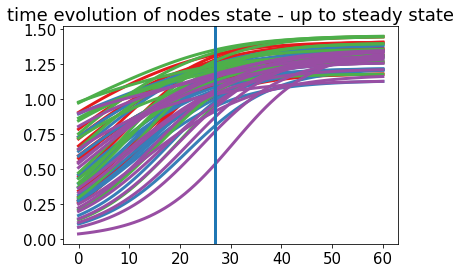

Char time:  27.0
Evaluating jacobian distance...
largest eig: 0.15153654125375948
eigs sum: -7.829044640228391


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.1, 0.01]
Integration up to steady state...


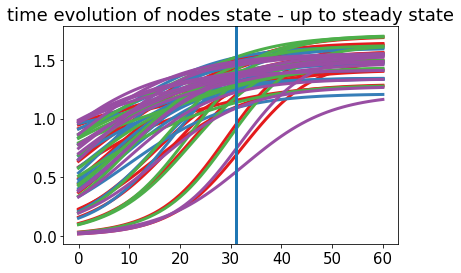

Char time:  31.0
Evaluating jacobian distance...
largest eig: 0.17749848129853196
eigs sum: -8.874486417584823


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.1, 0.02]
Integration up to steady state...


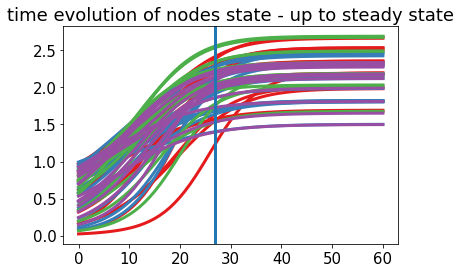

Char time:  27.0
Evaluating jacobian distance...
largest eig: 0.2769039126827081
eigs sum: -13.067586930839774


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.1, 0.05]
Integration up to steady state...


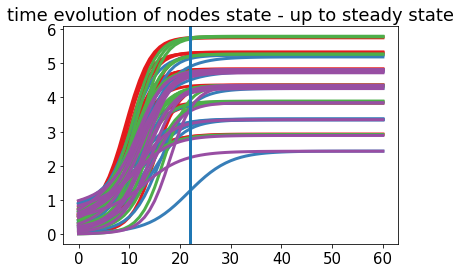

Char time:  22.0
Evaluating jacobian distance...
largest eig: 0.5821651767581606
eigs sum: -26.237700593206423


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.1, 0.1]
Integration up to steady state...


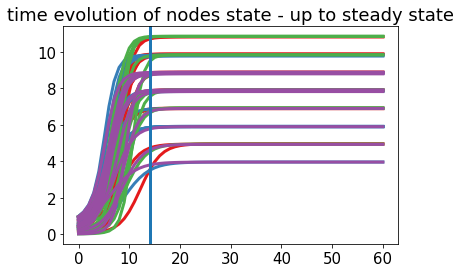

Char time:  14.0
Evaluating jacobian distance...
largest eig: 1.0885208241059892
eigs sum: -47.91972141596355


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.5, 0.007]
Integration up to steady state...


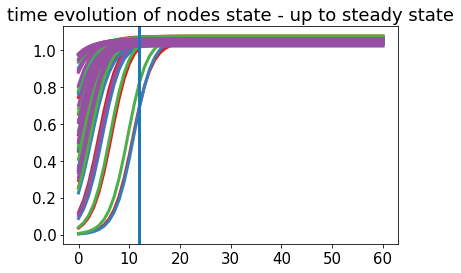

Char time:  12.0
Evaluating jacobian distance...
largest eig: 0.5452867880236901
eigs sum: -31.571736472643067


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.5, 0.01]
Integration up to steady state...


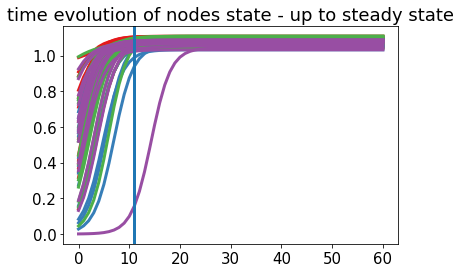

Char time:  11.0
Evaluating jacobian distance...
largest eig: 0.5658233523735406
eigs sum: -32.296181474089195


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.5, 0.02]
Integration up to steady state...


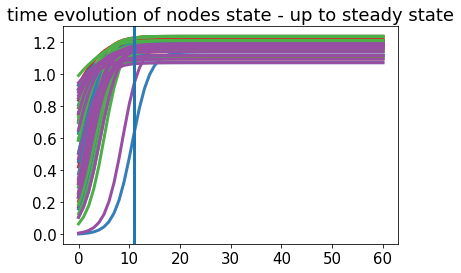

Char time:  11.0
Evaluating jacobian distance...
largest eig: 0.639082603529023
eigs sum: -34.9391912151907


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.5, 0.05]
Integration up to steady state...


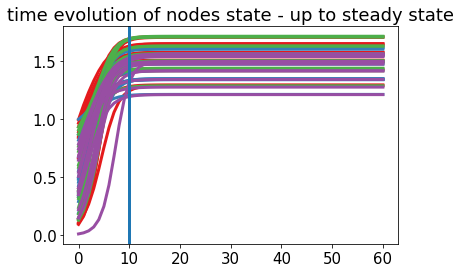

Char time:  10.0
Evaluating jacobian distance...
largest eig: 0.8960338144745752
eigs sum: -44.86198928435041


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.5, 0.1]
Integration up to steady state...


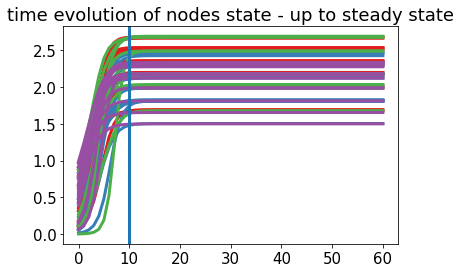

Char time:  10.0
Evaluating jacobian distance...
largest eig: 1.3848126451427794
eigs sum: -65.37614951010231


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [1.0, 0.007]
Integration up to steady state...


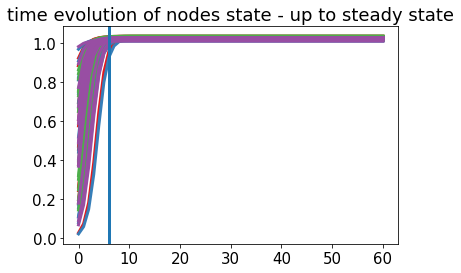

Char time:  6.0
Evaluating jacobian distance...
largest eig: 1.0443669794487058
eigs sum: -61.53092505053015


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [1.0, 0.01]
Integration up to steady state...


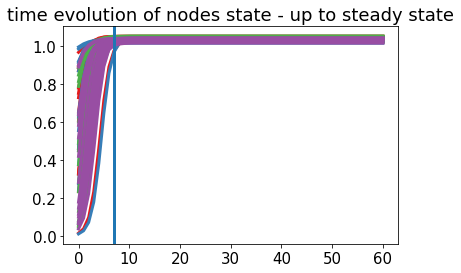

Char time:  7.0
Evaluating jacobian distance...
largest eig: 1.0639439397936743
eigs sum: -62.21187721162581


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [1.0, 0.02]
Integration up to steady state...


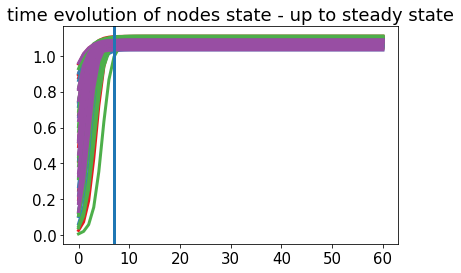

Char time:  7.0
Evaluating jacobian distance...
largest eig: 1.1316467047476717
eigs sum: -64.59236294473948


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [1.0, 0.05]
Integration up to steady state...


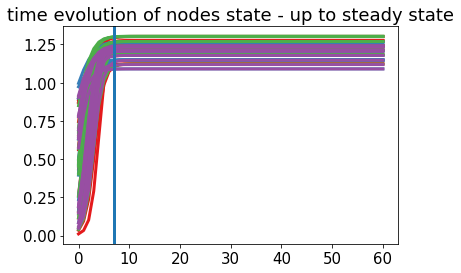

Char time:  7.0
Evaluating jacobian distance...
largest eig: 1.3567140287941897
eigs sum: -72.78602680321961


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [1.0, 0.1]
Integration up to steady state...


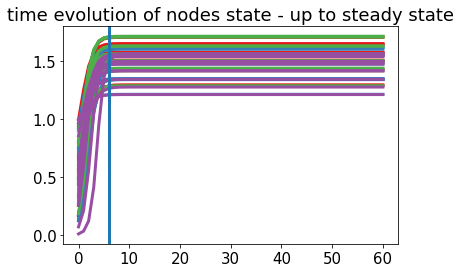

Char time:  6.0
Evaluating jacobian distance...
largest eig: 1.792067628903434
eigs sum: -89.72397856297425


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [2.0, 0.007]
Integration up to steady state...


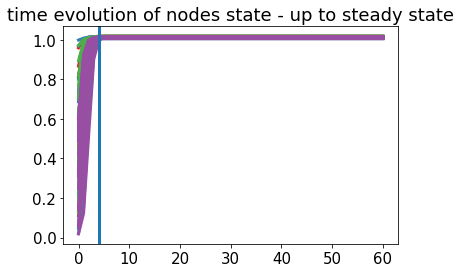

Char time:  4.0
Evaluating jacobian distance...
largest eig: 2.0439088510734305
eigs sum: -121.51084463799


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [2.0, 0.01]
Integration up to steady state...


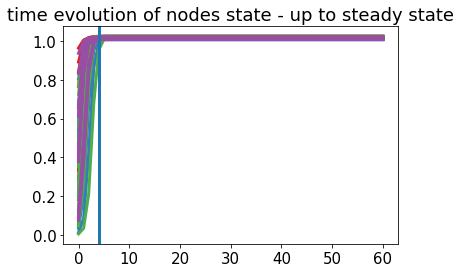

Char time:  4.0
Evaluating jacobian distance...
largest eig: 2.063007134421796
eigs sum: -122.17060347428443


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [2.0, 0.02]
Integration up to steady state...


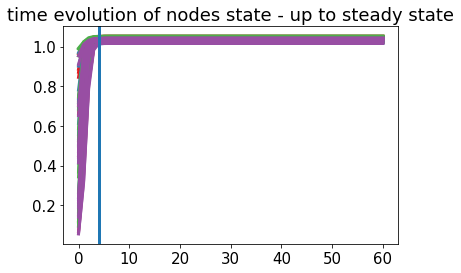

Char time:  4.0
Evaluating jacobian distance...
largest eig: 2.1278878795833465
eigs sum: -124.42375442285075


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [2.0, 0.05]
Integration up to steady state...


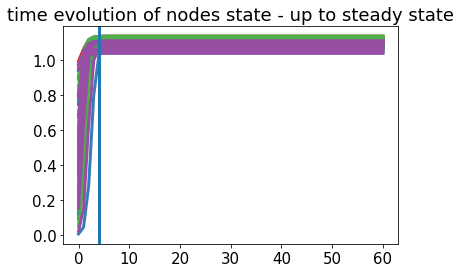

Char time:  4.0
Evaluating jacobian distance...
largest eig: 2.3338072826902865
eigs sum: -131.69532184898227


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [2.0, 0.1]
Integration up to steady state...


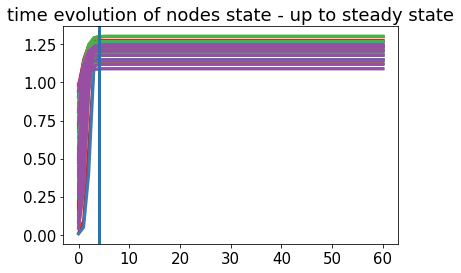

Char time:  4.0
Evaluating jacobian distance...
largest eig: 2.713428057580557
eigs sum: -145.57205360597774


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [5.0, 0.007]
Integration up to steady state...


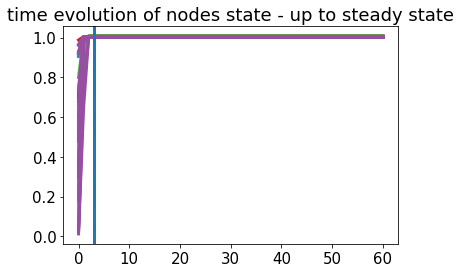

Char time:  3.0
Evaluating jacobian distance...
largest eig: 5.043634828419599
eigs sum: -301.49890873698536


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [5.0, 0.01]
Integration up to steady state...


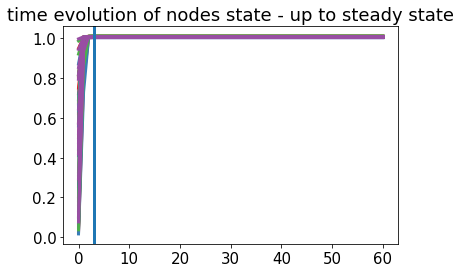

Char time:  3.0
Evaluating jacobian distance...
largest eig: 5.062447209825426
eigs sum: -302.14615738190616


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [5.0, 0.02]
Integration up to steady state...


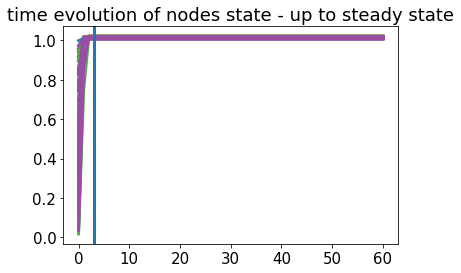

Char time:  3.0
Evaluating jacobian distance...
largest eig: 5.125640560833571
eigs sum: -304.32485468602647


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [5.0, 0.05]
Integration up to steady state...


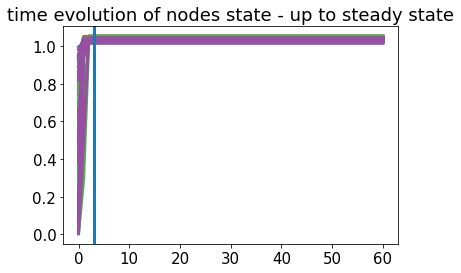

Char time:  3.0
Evaluating jacobian distance...
largest eig: 5.319719698958214
eigs sum: -311.0593860571189


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [5.0, 0.1]
Integration up to steady state...


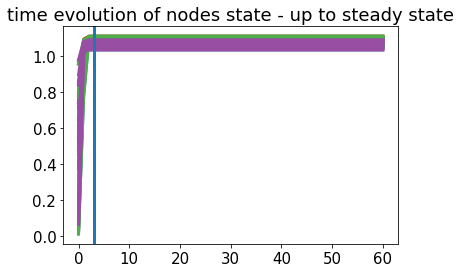

Char time:  3.0
Evaluating jacobian distance...
largest eig: 5.65823352369643
eigs sum: -322.9618147222549


  0%|          | 0/61 [00:00<?, ?it/s]

In [343]:
res_params = Simu_params(G_gn, infoG_gn, dynamics, params)

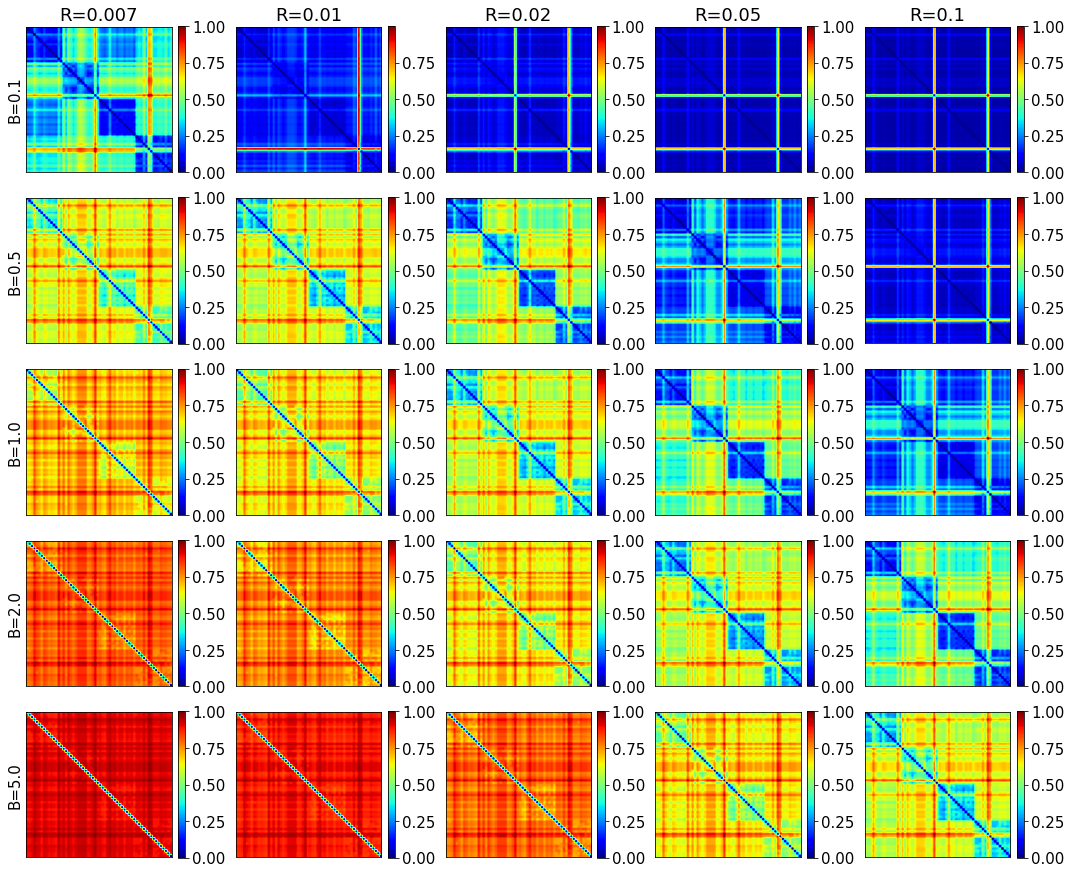

In [344]:
plotter.plot_average_dist_matrix_square(res_params[1], params_rows, params_cols, hspace=-.97, norm = True)

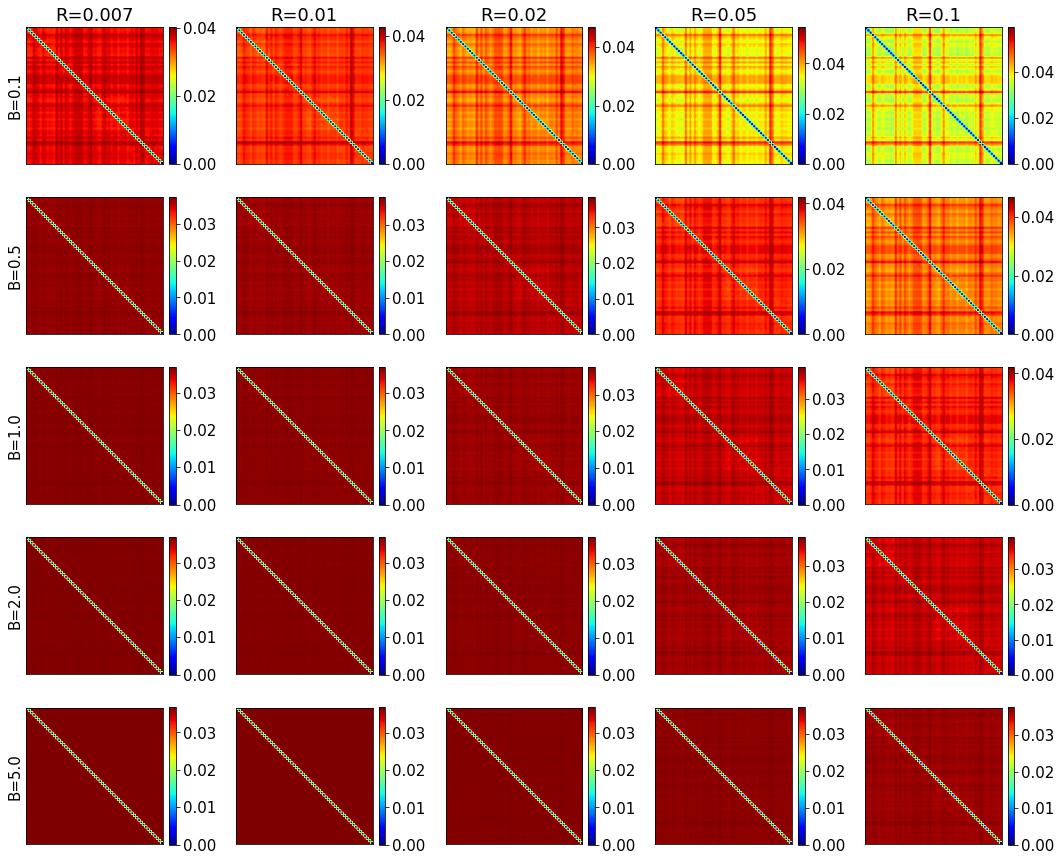

In [345]:
plotter.plot_average_dist_matrix_square(res_params[1], params_rows, params_cols, hspace=-.97)

# Hierarchical clustering

In [441]:
from seaborn import clustermap

In [506]:
# Get metadata from graph
metadata = dict(G_gn.nodes(data=True))
blocks = [metadata[tmp]['block'] for tmp in metadata]
blocks = np.array(blocks)

# Define block colors
lut = dict(zip(np.unique(blocks), "rbgy"))
row_colors = [lut[element] for element in blocks]

In [811]:
avg_dist_mats = [plotter.get_average_norm(mat) for mat in avg_dist_t]

In [812]:
def plot_clustermap(matrix, row_colors=None, method='complete', figsize=(10,10), title=None):
    
    clust_map = clustermap(matrix, method=method,
                           cbar_kws = dict(orientation="horizontal"),
                           row_colors=row_colors,
                           figsize=figsize)

    clust_map.ax_col_dendrogram.set_visible(False) # hide dendrogram above columns
    #clust_map.set(xlabel='my x label', ylabel='my y label')
    
    # Setup colorbar
    x0, _y0, _w, _h = clust_map.cbar_pos
    clust_map.ax_cbar.set_position([x0*20, 0.825, clust_map.ax_row_dendrogram.get_position().width*2, 0.02])
    clust_map.ax_cbar.set_title('distance')
    
    plt.title(title)
    plt.show()

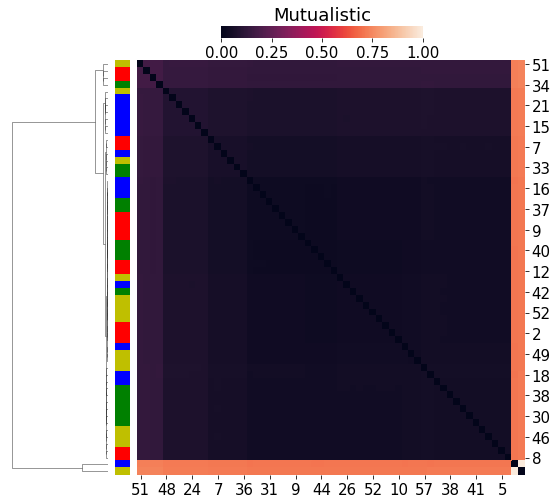

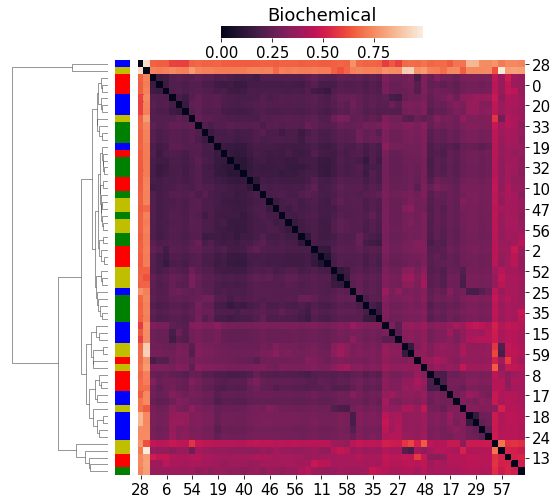

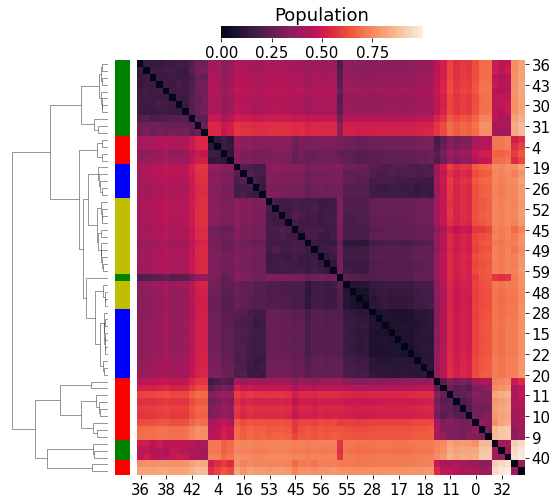

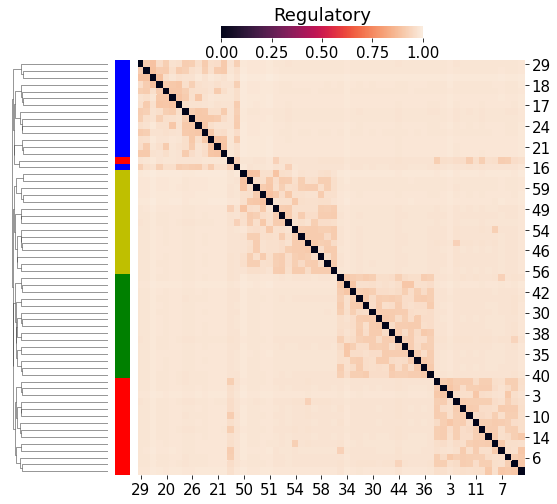

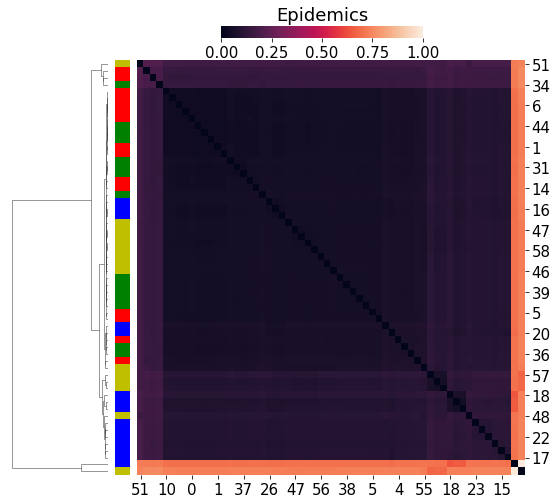

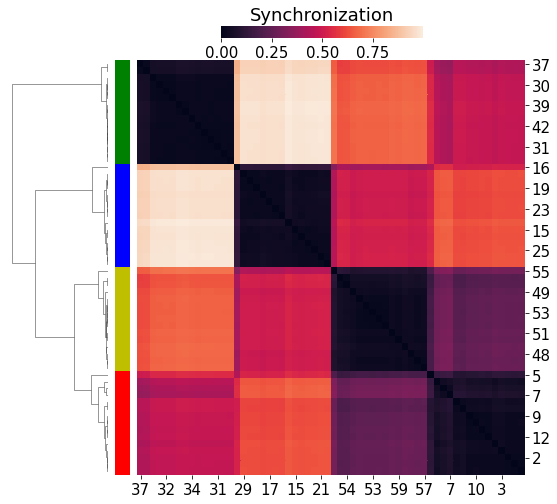

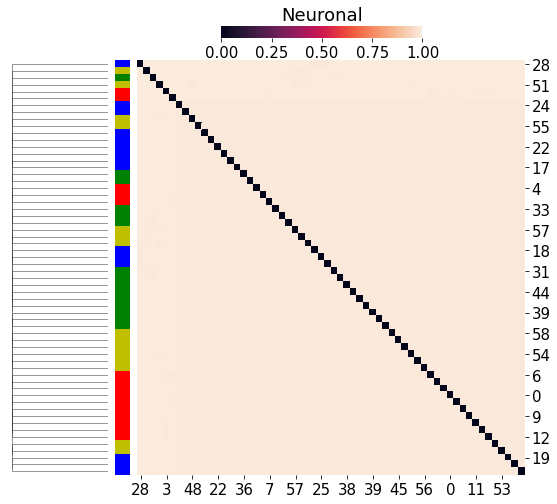

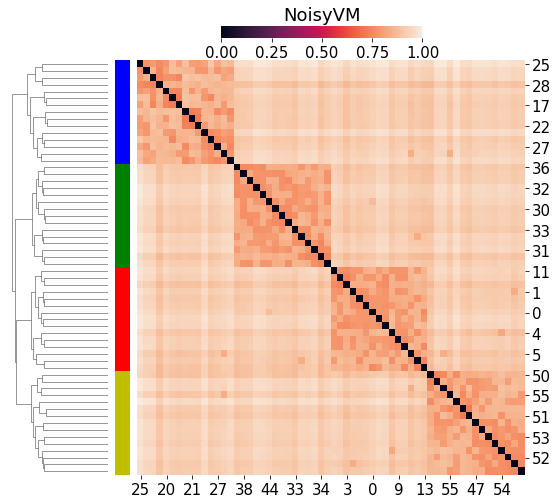

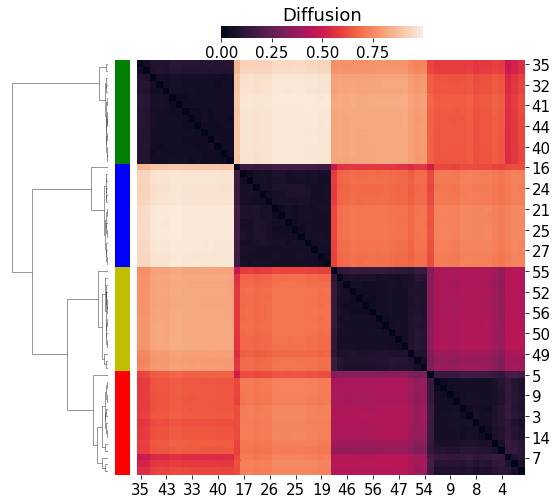

In [813]:
for i, matrix in enumerate(avg_dist_mats):
    plot_clustermap(matrix, row_colors=row_colors, figsize=(8,8), title=dynamics_list[i])